<a href="https://colab.research.google.com/github/emily-indrakusuma/KMeanswithMinMax/blob/main/KMeans-TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


Preprocessing

In [ ]:
df = pd.read_excel("cobaKmeans.xlsx")
df.head()

,Document,X,Y
0,1,0.088046,1.5
1,2,0.321491,3.0
2,3,0.163303,2.5


# **K-Means with 2 Centroids**

In [ ]:
k = 2
# rows = df.shape[0] 
# cols = df.shape[1] 

centroids = df.loc[[0,1],:] 

In [ ]:
print(centroids)

   Document         X    Y
0         1  0.088046  1.5
1         2  0.321491  3.0


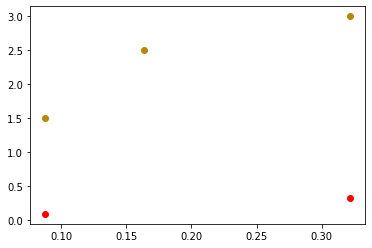

In [ ]:
plt.scatter(df["X"],df["Y"],c='darkgoldenrod')
plt.scatter(centroids["X"],centroids["X"],c='red')
plt.show()

   Document  Cluster         1         2
0         1        1  0.000000  1.518057
1         2        2  1.518057  0.000000
2         3        2  1.002828  0.524427


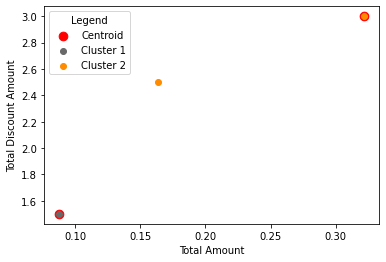

   Document  Cluster         1         2
0         1        1  0.000000  1.259494
1         2        2  1.518057  0.262213
2         3        2  1.002828  0.262213


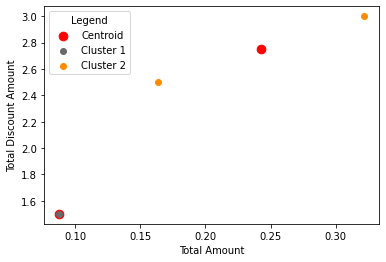

In [ ]:
diff = 1
val=0

for y in range(0,2):
    targetData=df
    i=1
    for index1,row_c in centroids.iterrows():
        ED=[]
        for index2,row_d in targetData.iterrows():
            d1=(row_c["X"]-row_d["X"])**2
            d2=(row_c["Y"]-row_d["Y"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df[i]=ED
        i=i+1  
    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    
    print(df[['Document','Cluster',1,2]])

    color=['dimgray','darkorange']
    clusters = ['Centroid','Cluster 1', 'Cluster 2']
    plt.scatter(centroids["X"],centroids["Y"],c='red',s=75)
    for K in range(k):
      data=df[df["Cluster"]==K+1]
      plt.scatter(data["X"],data["Y"],c=color[K])
    plt.xlabel('Total Amount')
    plt.ylabel('Total Discount Amount')
    plt.legend(labels=clusters,
           title="Legend")

    plt.show()
    
    
    centroids_new = df.groupby(["Cluster"]).mean()[["Y","X"]]
     
    centroids = df.groupby(["Cluster"]).mean()[["Y","X"]]

In [ ]:
df.head(3)

,Document,X,Y,1,2,Cluster
0,1,0.088046,1.5,0.000000,1.259494,1
1,2,0.321491,3.0,1.518057,0.262213,2
2,3,0.163303,2.5,1.002828,0.262213,2
